# Marvel Data

In [1]:
import json
from collections import defaultdict, Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling
%matplotlib inline

In [2]:
data_dir = Path("data")
output_dir = Path("img")
Path.mkdir(output_dir, exist_ok=True)

In [3]:
def load_data(endpoint):
    endpoint_pages = sorted(data_dir.glob(f"{endpoint}_*.json"))
    
    endpoints = defaultdict(dict)
    for page in endpoint_pages:
        for char in json.loads(page.read_text()):
            endpoints[char["id"]] = char
    return endpoints

In [4]:
def parse_data(endpoint_data):
    parsed_data = {}
    for char in endpoint_data:
        _id = endpoint_data[char]["id"]
        name = endpoint_data[char]["name"]
        comics = endpoint_data[_id]["comics"].get("available", 0)
        series = endpoint_data[_id]["series"].get("available", 0)
        stories = endpoint_data[_id]["stories"].get("available", 0)
        events = endpoint_data[_id]["events"].get("available", 0)
        character = {
            "comics": comics,
            "series": series,
            "stories": stories,
            "events": events,
        }
        parsed_data[name] = character
    return parsed_data

In [5]:
def create_dataframe():
    _data = load_data("characters")
    data = parse_data(_data)
    return pd.DataFrame(data=data, dtype=np.int64).T

In [6]:
def popularity(df, category, count=5):
    names = df.nlargest(count, category, keep="last").loc[:, category].index
    values = df.nlargest(count, category, keep="last").loc[:, category].values
    data = {category: list(values)}
    index = list(names)
    dataframe = pd.DataFrame(data=data)
    dataframe.index = index
    ax = dataframe.plot.barh(
        rot=15,
        figsize=(12,8),
        color=[plt.cm.Paired(np.arange(len(df)))],
        alpha=0.8,
        legend=False,
    )
    ax.set_title(f"Characters in the most {category}", fontsize=20)
    ax.set_xlabel(category.title(), fontsize=12)
    ax.grid(False)
    ax.set_facecolor("white")
    # https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart#28931750
    rects = ax.patches
    for rect in rects:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        ha = "left"
        space = -35
        
        if x_value < 0:
            space *= -1
            ha = "right"
        
        plt.annotate(
            x_value,
            (x_value, y_value),
            xytext=(space, 0),
            textcoords="offset points",
            va="center",
            ha="left",
            color="white",
            fontsize=12,
        )
    plt.tight_layout()
    plt.show(block=True)
    fig = ax.get_figure()
    fig.savefig(f"{output_dir}/{category}.png")

In [7]:
df = create_dataframe()

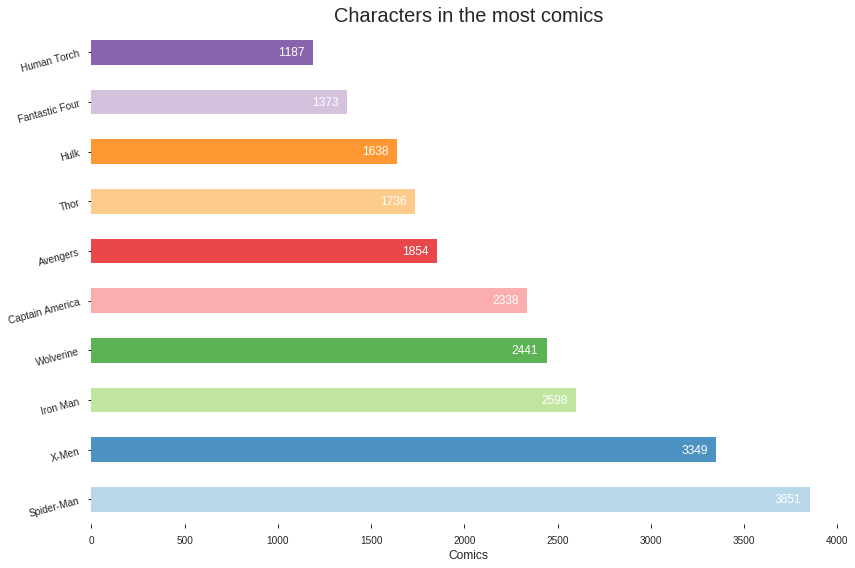

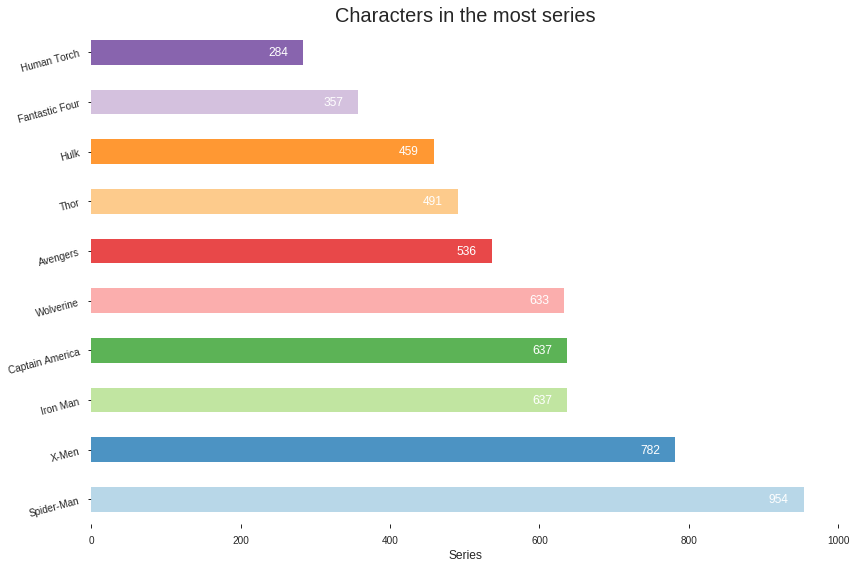

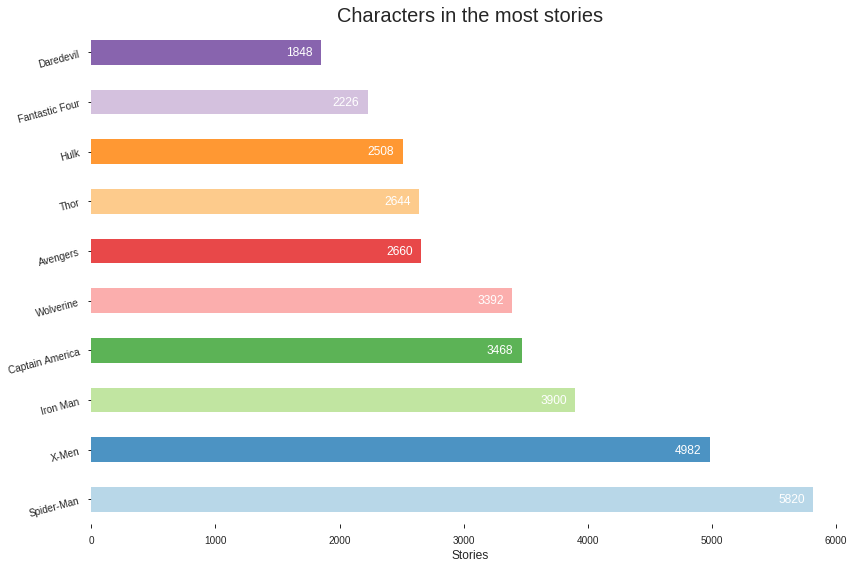

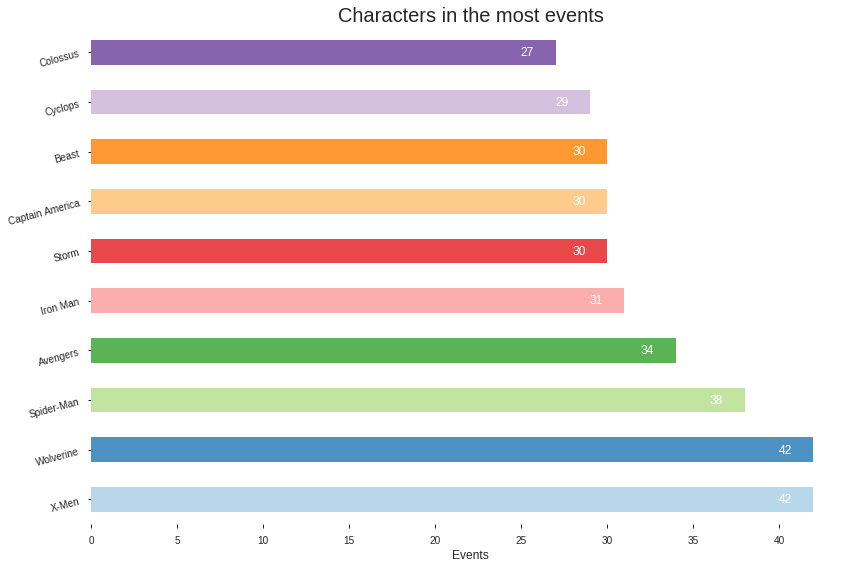

In [8]:
topics = "comics series stories events".split()
for category in topics:
    popularity(df, category, 10)

In [9]:
df.profile_report()